In [ ]:
# Experimenting with ecg reconstruction when performing the DWT to denoise.
# The db4 wavelet was used last semester but different thresholds and mother wavelets
# will be used to check this is the best choice for smooth reconstruction.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import pywt # Py Wavelets -> utilise the wavelet transform
import scipy
from scipy import signal

In [22]:
# This is the function that performs the noise removal of the signal
# The argument of function contains relevant constants
def DWT(signal, thresh, wavelet, num_leads = 2):
    # Make an empty array for the final de noised signal
    de_noised = np.zeros_like(signal)
    # Loop over the number of leads, filter each one then put into de_noised array
    for j in range(num_leads):
        # This performs the de-noising
        threshold = thresh*np.nanmax(signal[:,j])
        coeff = pywt.wavedec(signal[:,j], wavelet, mode="smooth")
        coeff[14:] = (pywt.threshold(i, value=threshold, mode="soft" ) for i in coeff[14:])
        reconstructed_signal = pywt.waverec(coeff, wavelet, mode="smooth" )

        de_noised[:,j] = reconstructed_signal
    
    return de_noised

In [23]:
# load in one raw ecg    
with open('1_array.pkl','rb') as f:
    test = pickle.load(f)

In [24]:
# Perform denoising with different thresholds
# 0.2 was used in the previous semester
thresh_list = [0.2, 0.1, 0.05, 0.003]
new_data_1 = DWT(test, thresh_list[0], wavelet="db4", num_leads = 2)
new_data_2 = DWT(test, thresh_list[1], wavelet="db4", num_leads = 2)
new_data_3 = DWT(test, thresh_list[2], wavelet="db4", num_leads = 2)
new_data_4 = DWT(test, thresh_list[3], wavelet="db4", num_leads = 2)

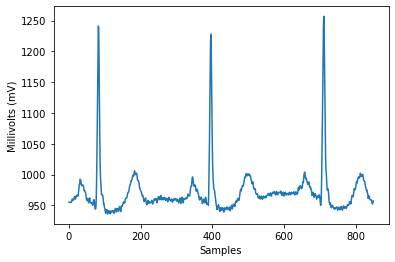

In [25]:
plt.plot(test[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('RAW ECG',dpi=200)

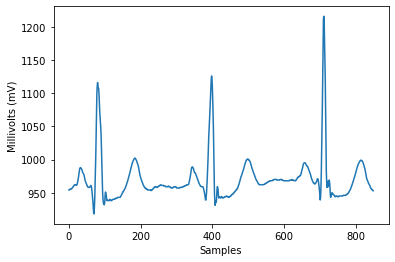

In [26]:
plt.plot(new_data_1[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('Denoised ECG db4 thresh pt2',dpi=200)

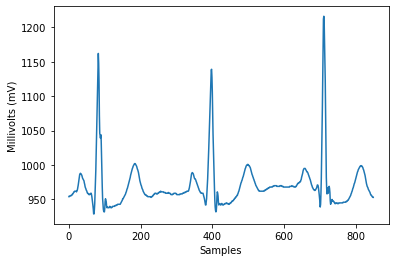

In [27]:
plt.plot(new_data_2[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('Denoised ECG db4 thresh pt1',dpi=200)

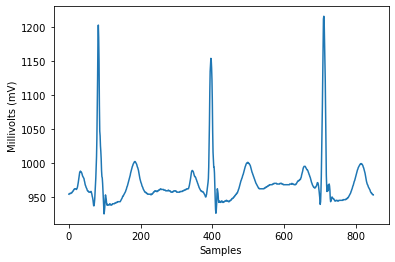

In [28]:
plt.plot(new_data_3[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('Denoised ECG db4 thresh pt05',dpi=200)

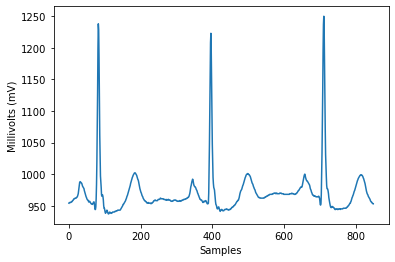

In [29]:
plt.plot(new_data_4[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('Denoised ECG db4 thresh pt003',dpi=200)

Text(0, 0.5, 'Millivolts (mV)')

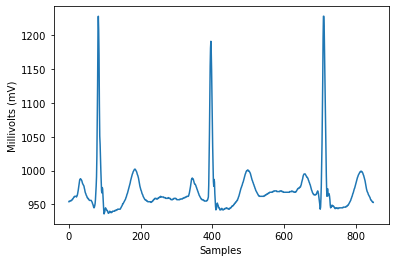

In [52]:
#Random threshold to experiment with
plt.plot(DWT(test, thresh = 0.05, wavelet="db4", num_leads = 2)[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
#plt.savefig('Denoised ECG db4 thresh pt01',dpi=200)

In [57]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [58]:
for family in pywt.families():
    print(pywt.wavelist(family))

['haar']
['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8']
['dmey']
['gaus1', 'gaus2', 'gaus3', 

In [74]:
db4 = DWT(test, thresh=0.01, wavelet="db4", num_leads = 2)
db8 = DWT(test, thresh=0.01, wavelet="db8", num_leads = 2)
sym5 = DWT(test, thresh=0.01, wavelet="sym5", num_leads = 2)

Text(0, 0.5, 'Millivolts (mV)')

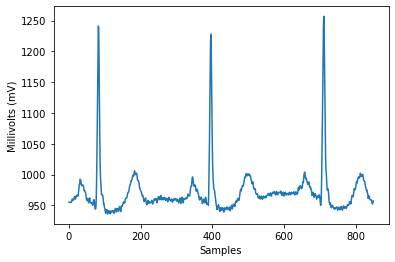

In [75]:
plt.plot(test[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
#plt.savefig('RAW ECG',dpi=200)

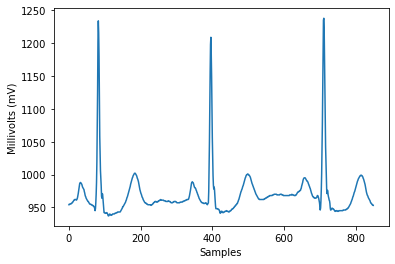

In [76]:
plt.plot(db4[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('db4 denoised ECG',dpi=200)

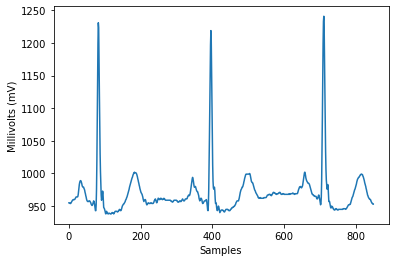

In [77]:
plt.plot(db8[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('db8 denoised ECG',dpi=200)

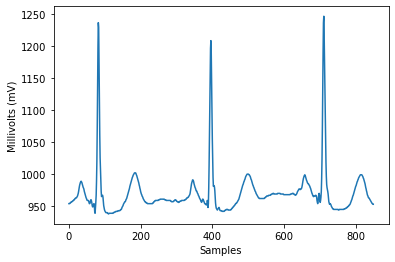

In [78]:
plt.plot(sym5[:850,0])
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('sym5 denoised ECG',dpi=200)

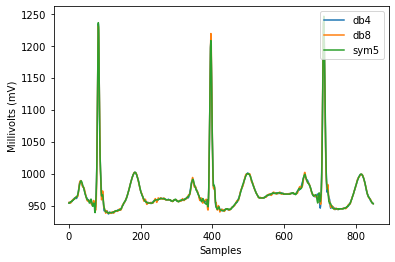

In [84]:
plt.plot(db4[:850,0], label = "db4")
plt.plot(db8[:850,0], label = "db8")
plt.plot(sym5[:850,0], label = "sym5")
plt.legend(loc = 1)
plt.xlabel('Samples')
plt.ylabel('Millivolts (mV)')
plt.savefig('3 wavelet choices overlayed',dpi=200)